In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from utils import *

In [16]:
tex_fonts = {
    #source: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    #"axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'text.latex.preamble': r"\usepackage{amsmath}"
}

In [24]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Read the CSV file
csv_file = 'LondonLSOAs.csv'
df = pd.read_csv(csv_file)

# Convert the 'geometry' column to Shapely geometry objects
df['geometry'] = df['geometry'].apply(wkt.loads)

# Create the GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Display the GeoDataFrame to ensure it's correct
print(gdf.head())


                    LSOA21NM     centroid_x     centroid_y  c_percent asian  \
0        City of London 001A  532151.194178  181615.201393         0.107191   
1        City of London 001B  532443.686041  181645.724884         0.130592   
2        City of London 001C  532207.014825  182030.129598         0.094913   
3        City of London 001E  533618.348516  181157.354255         0.321526   
4  Barking and Dagenham 016A  544934.369716  184297.546524         0.479675   

   c_percent black  c_percent mixed  c_percent white  c_percent sikh  \
0         0.007463         0.037992         0.801221        0.000000   
1         0.007937         0.043290         0.782107        0.000000   
2         0.034739         0.062655         0.741315        0.001860   
3         0.108084         0.071753         0.385104        0.000000   
4         0.108401         0.037940         0.327913        0.036295   

   c_percent hindu  c_percent christian  ...  e_snow_and_ice  \
0         0.026441          

In [25]:
def plot_variable_v2(gdf, variable, variable_name):

    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # Parameters to display missing data in black
    missing_data_color = {
        'color': 'black',
        # 'color':'#808080',
        # 'edgecolor': 'black',
        # 'hatch': '///',  # this is optional, if you'd like a hatch pattern for missing data
        'label': 'Missing Data'
    }

    # Plotting the GeoPandas DataFrame
    ax = gdf.plot(column=variable, legend=True, figsize=(15, 10), cmap=colormap, missing_kwds=missing_data_color)

    # Remove the axes
    plt.axis('off')

    # Customize the legend font size
    # Get the color bar object
    cax = plt.gcf().axes[-1]

    # Customize the color bar font size
    cax.tick_params(labelsize=33)

    # Title
    plt.title(variable_name, fontsize=44)

    return plt

In [13]:
def plot_variable(gdf, variable, variable_name):

    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # Plotting the GeoPandas DataFrame
    ax = gdf.plot(column=variable, legend=True, figsize=(15, 10), cmap=colormap)

    # Remove the axes
    plt.axis('off')

    # Customize the legend font size
    # Get the color bar object
    cax = plt.gcf().axes[-1]

    # Customize the color bar font size
    cax.tick_params(labelsize=33)

    # Remove the axes
    plt.title(variable_name, fontsize=44)

    return plt

In [27]:
# 这里是绘制函数
def plot_variable_v3(ax, gdf, variable, variable_name):

    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # Parameters to display missing data in black
    missing_data_color = {
        'color': 'black',
        'label': 'Missing Data'
    }

    # Plotting the GeoPandas DataFrame
    gdf.plot(column=variable, ax=ax, legend=True, cmap=colormap, missing_kwds=missing_data_color)

    # Remove the axes
    ax.axis('off')

    # Customize the legend font size
    # Get the color bar object
    cax = plt.gcf().axes[-1]

    # Customize the color bar font size
    cax.tick_params(labelsize=10)

    # Title
    ax.set_title(variable_name, fontsize=12)

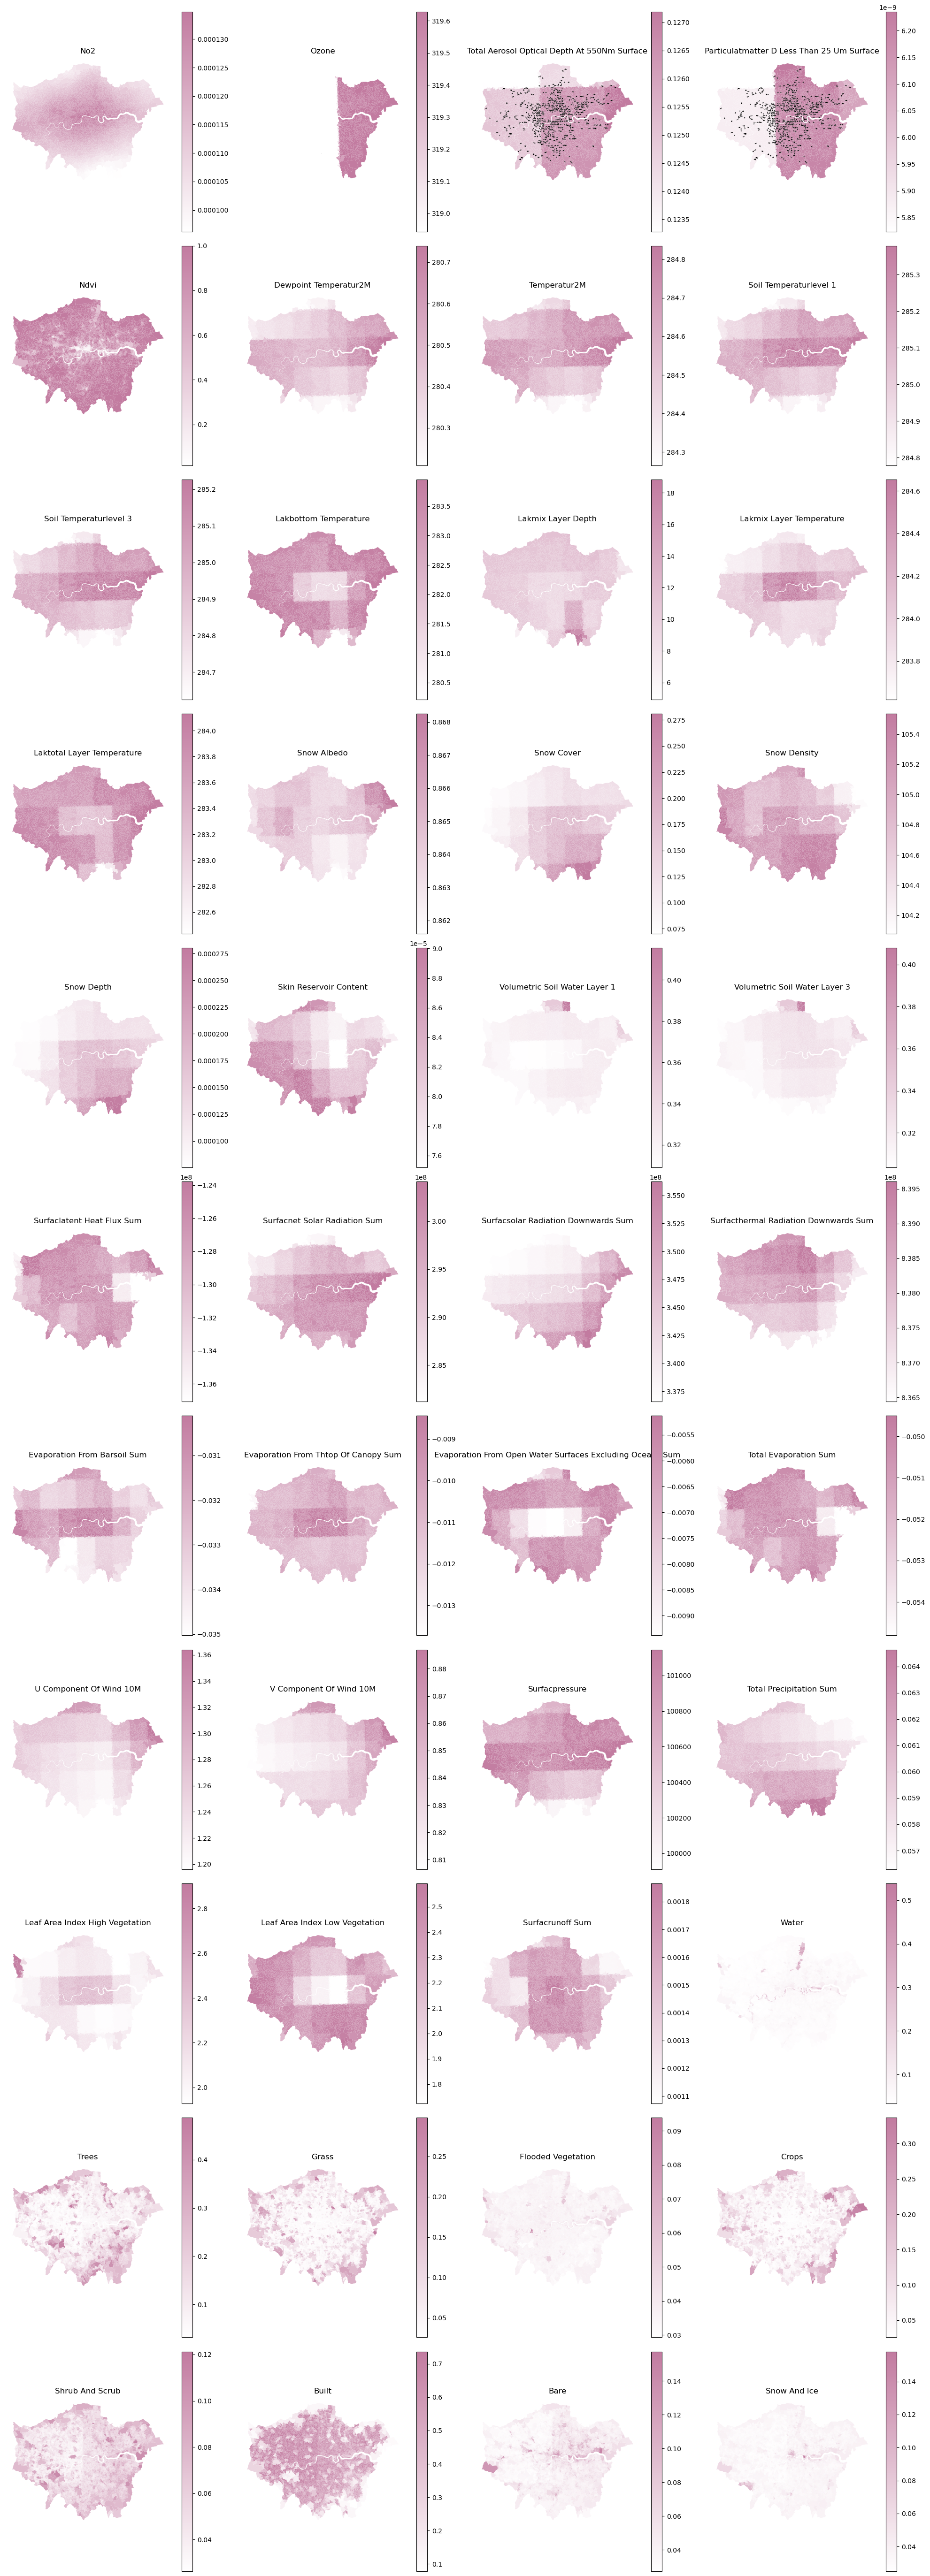

In [28]:
# 提取所有以 'e' 开头的变量
environmental_variables = [col for col in gdf.columns if col.startswith('e')]

# 设置子图的布局
num_vars = len(environmental_variables)
num_cols = 4  # 每行显示的子图数
num_rows = (num_vars + num_cols - 1) // num_cols  # 计算需要多少行

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# 绘制所有环境变量
for i, variable in enumerate(environmental_variables):
    variable_name = variable.replace('e_', '').replace('_', ' ').title()
    plot_variable_v3(axes[i], gdf, variable, variable_name)

# 隐藏多余的子图
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\0\\anaconda3\\envs\\envGEOG0051\\Lib\\site-packages\\matplotlib\\pyplot.py'>

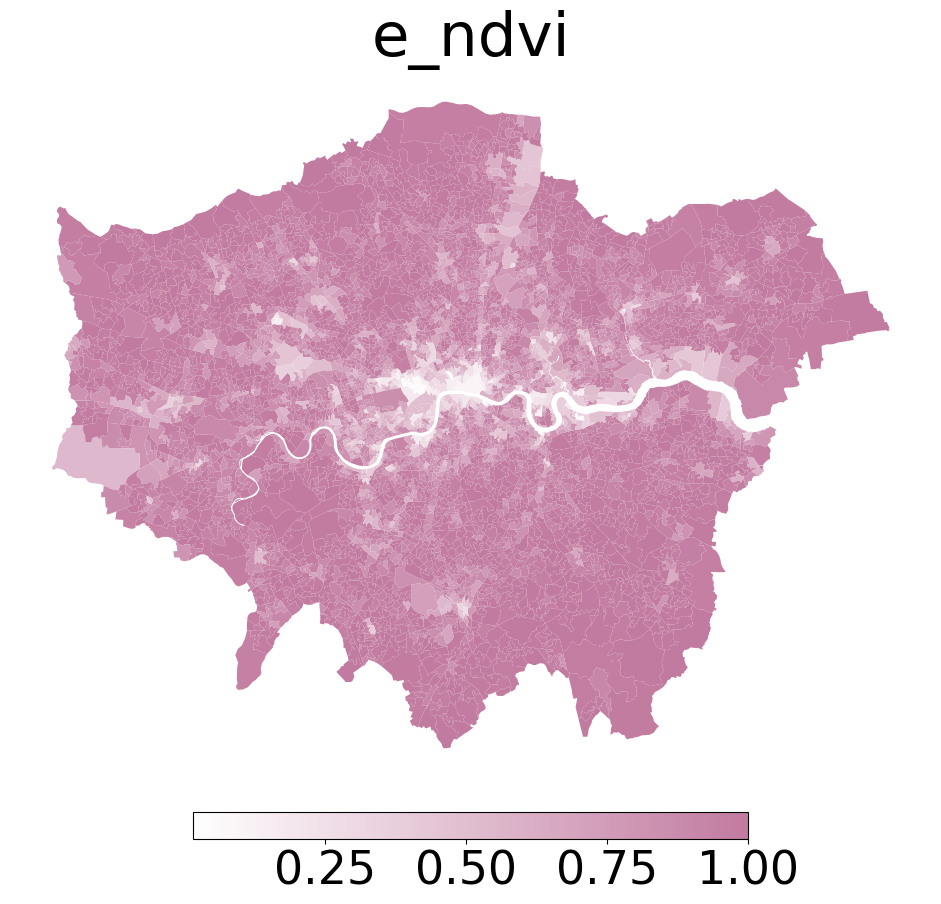

In [35]:
variable = 'e_ndvi'
variable_name = 'e_ndvi'
plot_variable_v2(gdf, variable, variable_name)

count    4994.000000
mean        0.865056
std         0.175766
min         0.015633
25%         0.812377
50%         0.938478
75%         0.985588
max         1.000000
Name: e_ndvi, dtype: float64


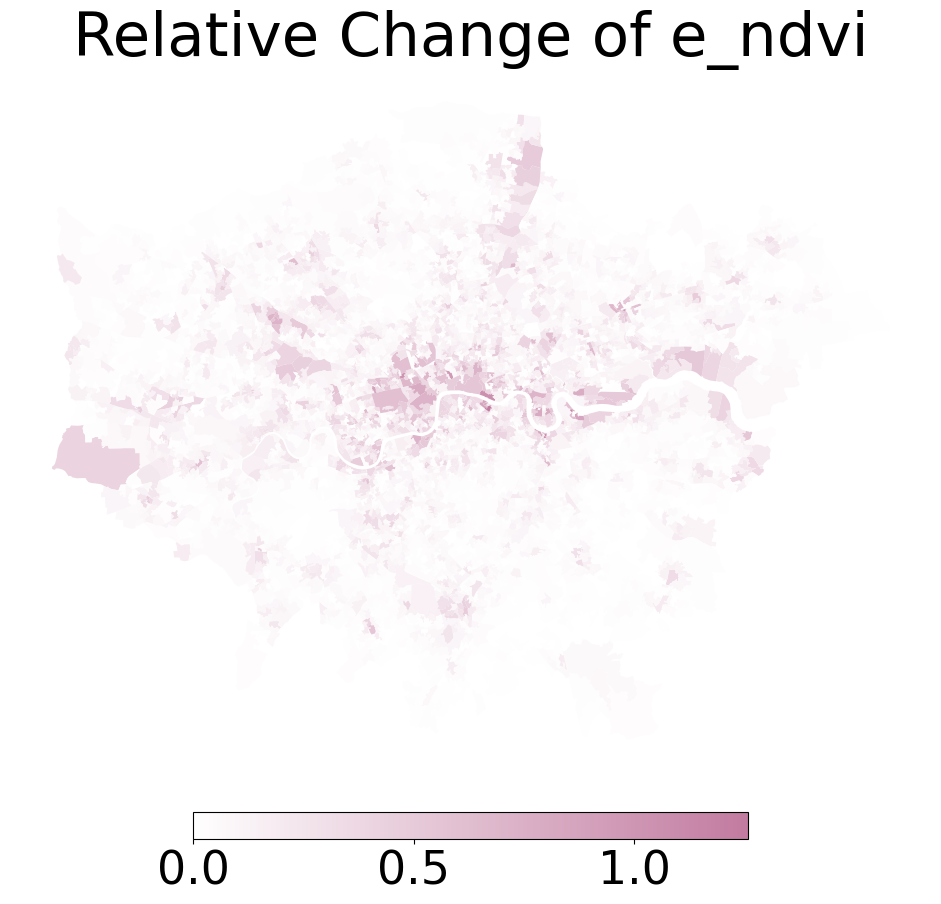

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shapely import wkt
from scipy.spatial import KDTree
import numpy as np

# 检查原始收入数据的基本统计信息
income_stats = gdf['e_ndvi'].describe()
print(income_stats)

# 计算相对变化率
def calculate_relative_change(gdf, variable, k=5):
    centroids = gdf.geometry.centroid
    kdtree = KDTree(np.array(list(zip(centroids.x, centroids.y))))
    relative_changes = []
    for idx, geom in gdf.iterrows():
        centroid = np.array([geom.geometry.centroid.x, geom.geometry.centroid.y])
        _, neighbors = kdtree.query(centroid, k=k+1)  # 选择最近的k个邻居，加上自身
        neighbor_values = gdf.iloc[neighbors[1:]][variable]  # 排除自身
        relative_change = np.abs(geom[variable] - neighbor_values.mean()) / neighbor_values.mean()
        relative_changes.append(relative_change)
    return relative_changes

# 更新绘图函数
def plot_variable_with_relative_change(gdf, variable, variable_name):
    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # 计算相对变化率
    gdf['relative_change'] = calculate_relative_change(gdf, variable)
    vmin = gdf['relative_change'].min()
    vmax = gdf['relative_change'].max()
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    # 绘制GeoPandas DataFrame
    ax = gdf.plot(column='relative_change', legend=False, figsize=(15, 10), cmap=colormap)

    # 移除坐标轴
    plt.axis('off')

    # 标题
    plt.title(f'Relative Change of {variable_name}', fontsize=44)

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm._A = []
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
    cbar.ax.tick_params(labelsize=33)

    return plt

variable = 'e_ndvi'
variable_name = 'e_ndvi'
plot = plot_variable_with_relative_change(gdf, variable, variable_name)
plot.show()


In [39]:
missing_values = gdf.isnull().sum()
variables_with_missing_values = missing_values[missing_values > 0]

for variable, missing_count in variables_with_missing_values.items():
    print(f"{variable}: {missing_count} missing values")

c_net annual income: 178 missing values
e_NO2: 1 missing values
e_ozone: 1 missing values
e_total_aerosol_optical_depth_at_550nm_surface: 827 missing values
e_particulate_matter_d_less_than_25_um_surface: 827 missing values
o_diabetes_quantity_per_capita: 335 missing values
o_opioids_quantity_per_capita: 335 missing values
o_OME_per_capita: 335 missing values
o_total_quantity_per_capita: 335 missing values
o_asthma_quantity_per_capita: 335 missing values
o_hypertension_quantity_per_capita: 335 missing values
o_depression_quantity_per_capita: 335 missing values
o_anxiety_quantity_per_capita: 335 missing values


<module 'matplotlib.pyplot' from 'C:\\Users\\0\\anaconda3\\envs\\envGEOG0051\\Lib\\site-packages\\matplotlib\\pyplot.py'>

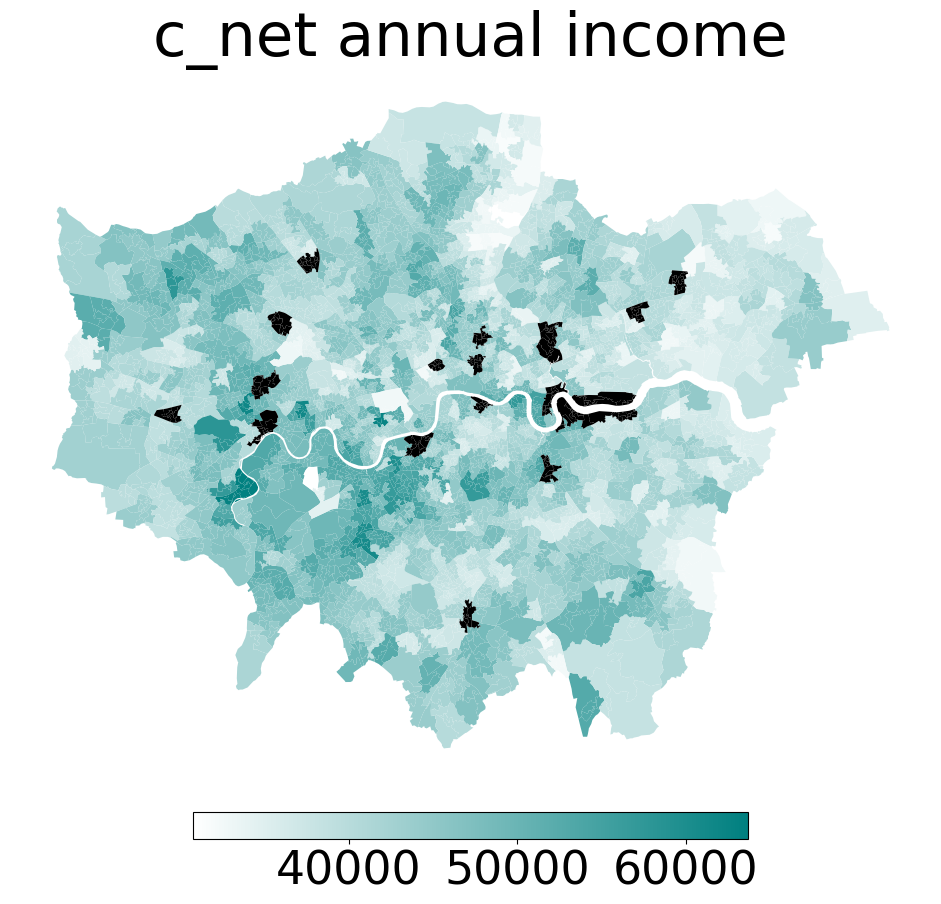

In [40]:
variable = 'c_net annual income'
variable_name = 'c_net annual income'
plot_variable_v2(gdf, variable, variable_name)

C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


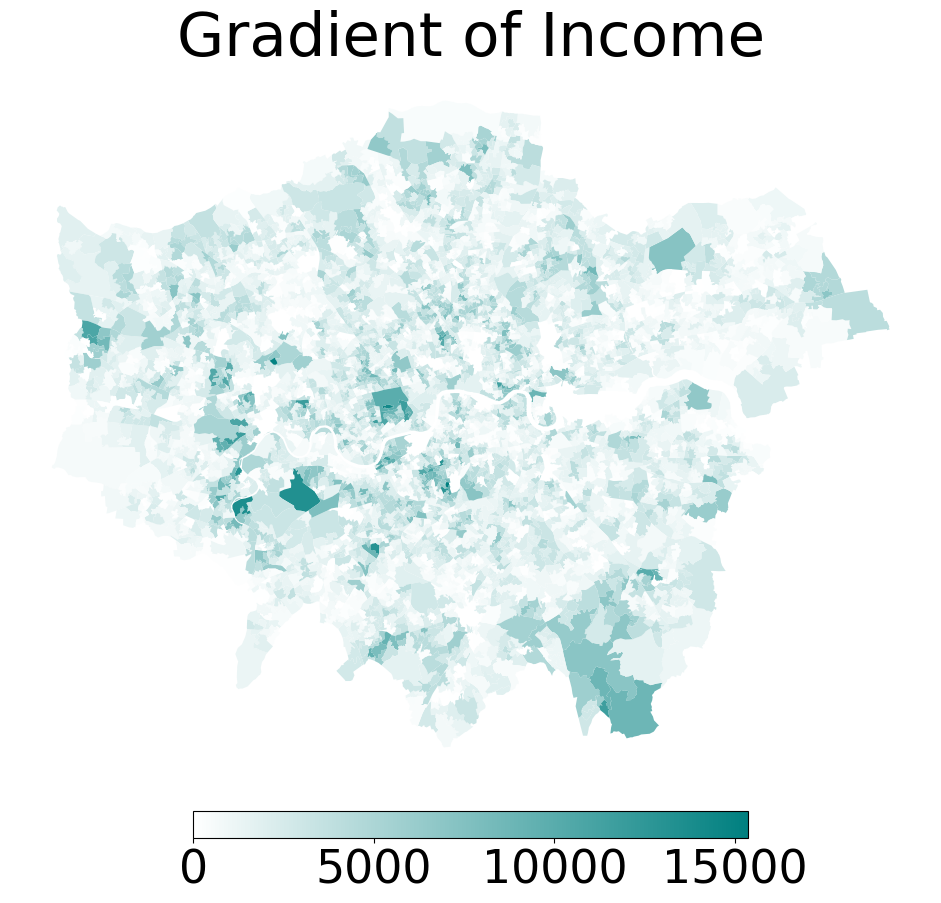

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shapely import wkt
from scipy.spatial import KDTree
import numpy as np

# 假设 gdf 已经加载并包含了 'c_net annual income' 列

# 过滤掉 'c_net annual income' 列中含有空值的行
gdf_filtered = gdf.dropna(subset=['c_net annual income'])

# 计算邻接梯度
def calculate_gradient(gdf, variable, k=5):
    centroids = gdf.geometry.centroid
    kdtree = KDTree(np.array(list(zip(centroids.x, centroids.y))))
    gradients = []
    for idx, geom in gdf.iterrows():
        centroid = np.array([geom.geometry.centroid.x, geom.geometry.centroid.y])
        _, neighbors = kdtree.query(centroid, k=k+1)  # 选择最近的k个邻居，加上自身
        neighbor_values = gdf.iloc[neighbors[1:]][variable]  # 排除自身
        gradient = np.abs(geom[variable] - neighbor_values.mean())
        gradients.append(gradient)
    return gradients

# 更新绘图函数
def plot_variable_with_gradient(gdf, variable, variable_name):
    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # 计算梯度
    gdf['gradient'] = calculate_gradient(gdf, variable)
    vmin = gdf['gradient'].min()
    vmax = gdf['gradient'].max()
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    # 绘制GeoPandas DataFrame
    ax = gdf.plot(column='gradient', legend=False, figsize=(15, 10), cmap=colormap)

    # 移除坐标轴
    plt.axis('off')

    # 标题
    plt.title(f'Gradient of {variable_name}', fontsize=44)

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm._A = []
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
    cbar.ax.tick_params(labelsize=33)

    return plt

# 使用过滤后的 gdf_filtered 进行计算和绘图
variable = 'c_net annual income'
variable_name = 'Income'
plot = plot_variable_with_gradient(gdf_filtered, variable, variable_name)
plot.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\0\\anaconda3\\envs\\envGEOG0051\\Lib\\site-packages\\matplotlib\\pyplot.py'>

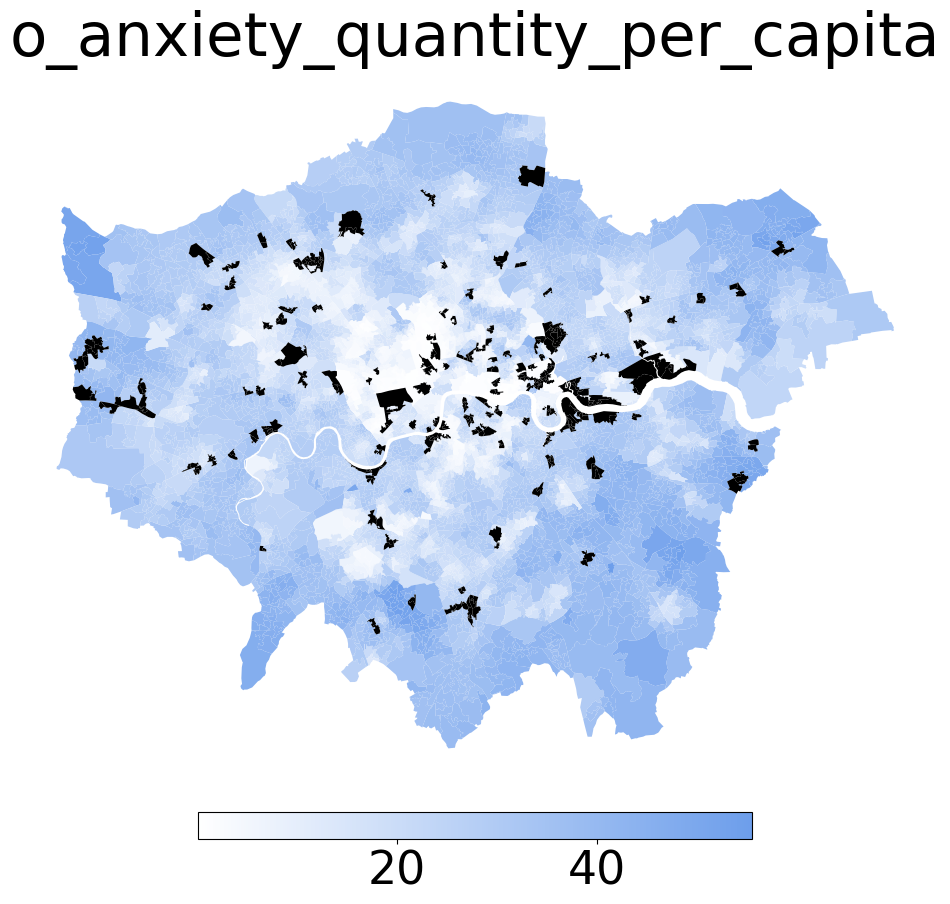

In [42]:
variable = 'o_anxiety_quantity_per_capita'
variable_name = 'o_anxiety_quantity_per_capita'
plot_variable_v2(gdf, variable, variable_name)

C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


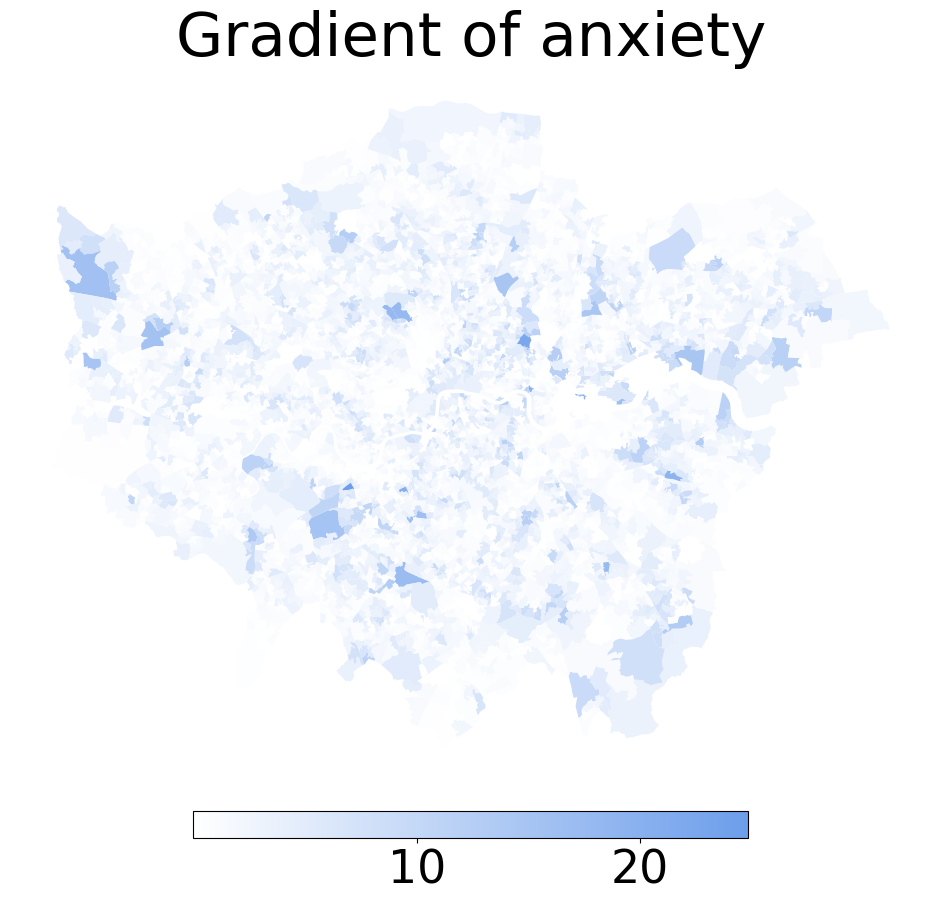

In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shapely import wkt
from scipy.spatial import KDTree
import numpy as np

# 过滤掉 'c_net annual income' 列中含有空值的行
gdf_filtered = gdf.dropna(subset=['o_anxiety_quantity_per_capita'])

# 计算邻接梯度
def calculate_gradient(gdf, variable, k=5):
    centroids = gdf.geometry.centroid
    kdtree = KDTree(np.array(list(zip(centroids.x, centroids.y))))
    gradients = []
    for idx, geom in gdf.iterrows():
        centroid = np.array([geom.geometry.centroid.x, geom.geometry.centroid.y])
        _, neighbors = kdtree.query(centroid, k=k+1)  # 选择最近的k个邻居，加上自身
        neighbor_values = gdf.iloc[neighbors[1:]][variable]  # 排除自身
        gradient = np.abs(geom[variable] - neighbor_values.mean())
        gradients.append(gradient)
    return gradients

# 更新绘图函数
def plot_variable_with_gradient(gdf, variable, variable_name):
    if variable.startswith('e'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#c27ba0'])
    elif variable.startswith('o'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#6d9eeb'])
    elif variable.startswith('c'):
        colormap = colors.LinearSegmentedColormap.from_list('', ['#ffffff', '#008080'])
    else:
        colormap = 'coolwarm'

    # 计算梯度
    gdf['gradient'] = calculate_gradient(gdf, variable)
    vmin = gdf['gradient'].min()
    vmax = gdf['gradient'].max()
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    # 绘制GeoPandas DataFrame
    ax = gdf.plot(column='gradient', legend=False, figsize=(15, 10), cmap=colormap)

    # 移除坐标轴
    plt.axis('off')

    # 标题
    plt.title(f'Gradient of {variable_name}', fontsize=44)

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm._A = []
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
    cbar.ax.tick_params(labelsize=33)

    return plt

# 使用过滤后的 gdf_filtered 进行计算和绘图
variable = 'o_anxiety_quantity_per_capita'
variable_name = 'anxiety'
plot = plot_variable_with_gradient(gdf_filtered, variable, variable_name)
plot.show()


In [50]:
gdf

LSOA21NM     centroid_x     centroid_y  \
0           City of London 001A  532151.194178  181615.201393   
1           City of London 001B  532443.686041  181645.724884   
2           City of London 001C  532207.014825  182030.129598   
3           City of London 001E  533618.348516  181157.354255   
4     Barking and Dagenham 016A  544934.369716  184297.546524   
...                         ...            ...            ...   
4989           Westminster 019G  527083.282054  180176.729445   
4990           Westminster 021F  530104.511513  178776.525179   
4991           Westminster 021G  530005.025734  178506.147240   
4992           Westminster 023H  528414.134365  178426.896667   
4993           Westminster 024G  529554.284302  178071.047468   

      c_percent asian  c_percent black  c_percent mixed  c_percent white  \
0            0.107191         0.007463         0.037992         0.801221   
1            0.130592         0.007937         0.043290         0.782107   
2            0.094913         0.034739         0.062655         0.741315   
3            0.321526         0.108084         0.071753         0.385104   
4            0.479675         0.108401         0.037940         0.327913   
...               ...              ...              ...              ...   
4989         0.209665         0.022214         0.072486         0.621590   
4990         0.158805         0.066824         0.058176         0.630503   
4991         0.110107         0.069022         0.105998         0.654889   
4992         0.180412         0.116409         0.054124         0.560137   
4993         0.220566         0.022355         0.043716         0.659712   

      c_percent sikh  c_percent hindu  c_percent christian  ...  \
0           0.000000         0.026441             0.345763  ...   
1           0.000000         0.015173             0.338150  ...   
2           0.001860         0.011159             0.340360  ...   
3           0.000000         0.014519             0.367514  ...   
4           0.036295         0.056880             0.371614  ...   
...              ...              ...                  ...  ...   
4989        0.006233         0.040125             0.419945  ...   
4990        0.000784         0.019608             0.431373  ...   
4991        0.001643         0.010682             0.458505  ...   
4992        0.003002         0.011578             0.433533  ...   
4993        0.001489         0.018362             0.433747  ...   

      o_diabetes_quantity_per_capita  o_opioids_quantity_per_capita  \
0                           0.834958                       0.129840   
1                           0.957987                       0.276066   
2                           1.532698                       0.592661   
3                           0.918772                       0.250619   
4                          33.986967                       4.982723   
...                              ...                            ...   
4989                             NaN                            NaN   
4990                             NaN                            NaN   
4991                             NaN                            NaN   
4992                             NaN                            NaN   
4993                             NaN                            NaN   

      o_OME_per_capita  o_total_quantity_per_capita  \
0             1.134302                     2.626636   
1             2.587085                     3.002415   
2             5.072608                     3.607429   
3             2.218236                     3.205100   
4           191.202486                     6.301225   
...                ...                          ...   
4989               NaN                          NaN   
4990               NaN                          NaN   
4991               NaN                          NaN   
4992               NaN                          NaN   
4993               NaN                          NaN   

      o_as

In [51]:
import pandas as pd

# 假设你的数据框是 gdf
# 提取所有包含年龄百分比的列
age_columns = [col for col in gdf.columns if 'c_percent Aged' in col]

# 定义每个年龄组的中位数年龄
age_medians = {
    'c_percent Aged 0 to 4 years': 2.5,
    'c_percent Aged 5 to 9 years': 7,
    'c_percent Aged 10 to 14 years': 12,
    'c_percent Aged 15 to 19 years': 17,
    'c_percent Aged 20 to 24 years': 22,
    'c_percent Aged 25 to 29 years': 27,
    'c_percent Aged 30 to 34 years': 32,
    'c_percent Aged 35 to 39 years': 37,
    'c_percent Aged 40 to 44 years': 42,
    'c_percent Aged 45 to 49 years': 47,
    'c_percent Aged 50 to 54 years': 52,
    'c_percent Aged 55 to 59 years': 57,
    'c_percent Aged 60 to 64 years': 62,
    'c_percent Aged 65 to 69 years': 67,
    'c_percent Aged 70 to 74 years': 72,
    'c_percent Aged 75 to 79 years': 77,
    'c_percent Aged 80 to 84 years': 82,
    'c_percent Aged 85 years and over': 87.5
}

# 计算每一行的年龄中位数
def calculate_median_age(row):
    total_percent = 0
    weighted_sum = 0
    for col in age_columns:
        if col in age_medians:
            total_percent += row[col]
            weighted_sum += row[col] * age_medians[col]
    if total_percent > 0:
        return weighted_sum / total_percent
    else:
        return None

gdf['c_age_median'] = gdf.apply(calculate_median_age, axis=1)


In [52]:
gdf['c_age_median']

0       47.107319
1       45.874907
2       45.498412
3       38.950429
4       37.173475
          ...    
4989    33.945455
4990    39.305259
4991    38.706549
4992    42.964991
4993    43.064582
Name: c_age_median, Length: 4994, dtype: float64

C:\Users\0\AppData\Local\Temp\ipykernel_26304\3916935563.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geo_centroid'] = gdf.centroid


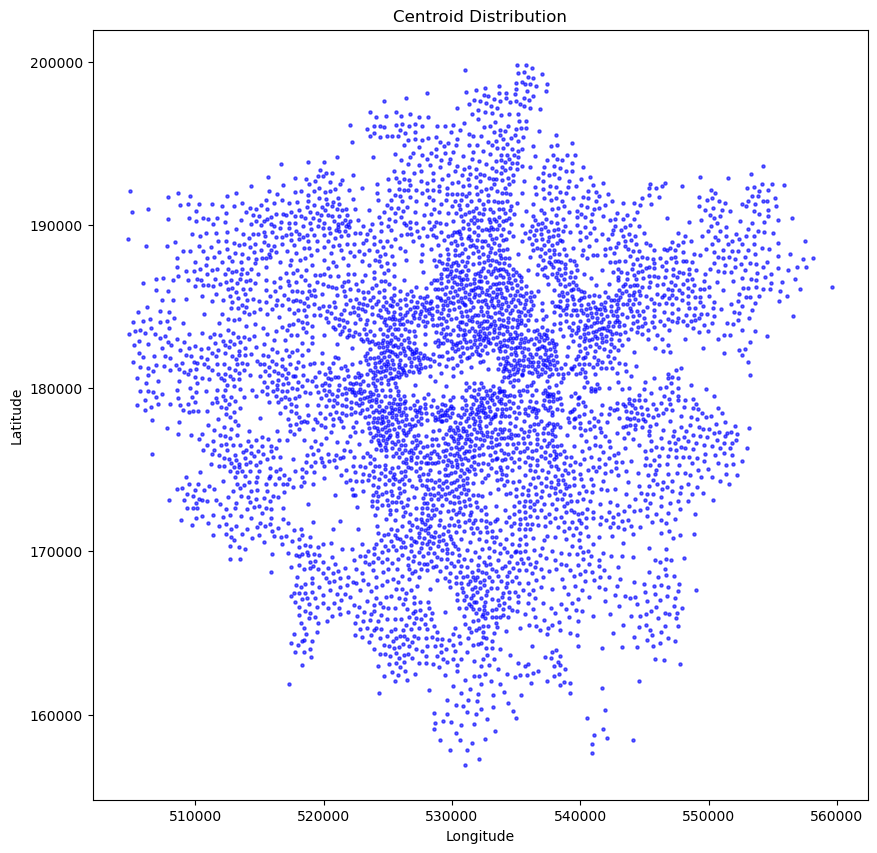

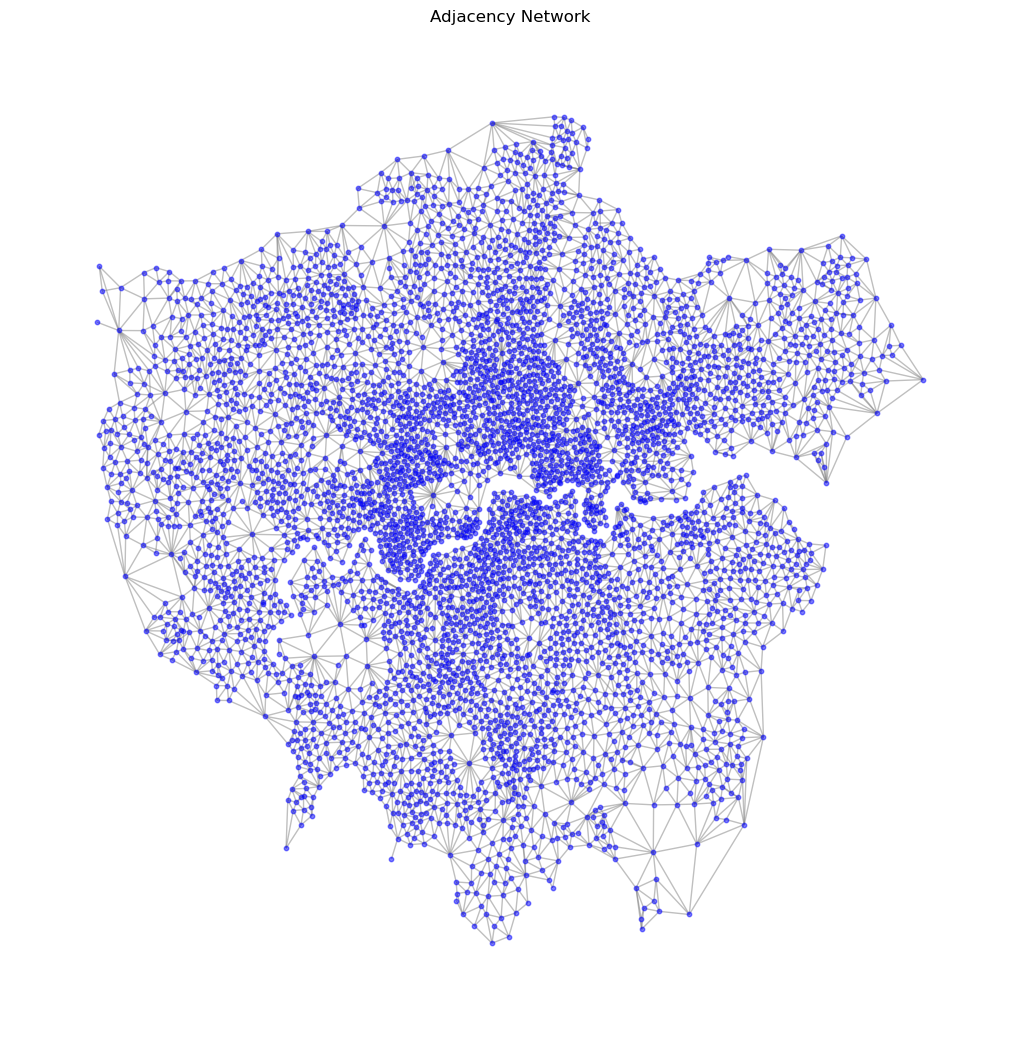

In [55]:
# 读取CSV文件并创建GeoDataFrame
csv_file = 'LondonLSOAs.csv'
df = pd.read_csv(csv_file)

# 创建几何对象（假设geometry列包含WKT格式的多边形数据）
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))

# 设置坐标系 (假设是WGS84坐标系)
gdf.set_crs(epsg=4326, inplace=True)

# 计算每个LSOA的几何中心点
gdf['geo_centroid'] = gdf.centroid

# 可视化几何中心点
coords = np.array(list(zip(gdf.geo_centroid.x, gdf.geo_centroid.y)))
plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1], s=5, c='blue', alpha=0.6)
plt.title("Centroid Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 计算相邻关系
neighbors = gpd.sjoin(gdf, gdf, how='left', predicate='intersects')

# 手动处理索引
neighbors = neighbors[neighbors.index != neighbors.index_right]

# 构建邻接矩阵
G = nx.Graph()

# 添加节点
for idx, row in gdf.iterrows():
    G.add_node(idx, pos=(row.geo_centroid.x, row.geo_centroid.y))

# 添加边，根据相邻关系
for idx, row in neighbors.iterrows():
    G.add_edge(row.name, row['index_right'], weight=1)

# 可视化邻接关系
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='grey', alpha=0.5)
plt.title("Adjacency Network")
plt.show()

In [63]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 读取CSV文件并创建GeoDataFrame
csv_file = 'LondonLSOAs.csv'
df = pd.read_csv(csv_file)

# 创建几何对象（假设geometry列包含WKT格式的多边形数据）
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))

# 设置坐标系 (假设是WGS84坐标系)
gdf.set_crs(epsg=4326, inplace=True)

# 提取所有 'c' 开头的变量
c_features_columns = [col for col in gdf.columns if col.startswith('c_')]
c_features = gdf[c_features_columns].apply(pd.to_numeric, errors='coerce')

# 提取目标变量
target_column = 'o_anxiety_quantity_per_capita'
target = gdf[target_column].apply(pd.to_numeric, errors='coerce').fillna(0)

# 初步筛选：移除与目标变量相关性较低的自变量（相关性绝对值小于0.1）
corr_with_target = c_features.corrwith(target).abs()
relevant_features = corr_with_target[corr_with_target > 0.1].index
c_features = c_features[relevant_features]

# 计算相关矩阵并删除相关性高于0.9的变量
correlation_matrix = c_features.corr().abs()
upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 找出高相关性变量
high_corr_var = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > 0.9)]

# 删除高相关性变量
c_features = c_features.drop(columns=high_corr_var)

# 计算VIF函数
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# 迭代移除VIF值最高的变量，直到所有变量的VIF值都小于10
while True:
    vif = calculate_vif(c_features)
    max_vif = vif['VIF'].max()
    if max_vif > 10:
        max_vif_var = vif.loc[vif['VIF'] == max_vif, 'Variable'].values[0]
        print(f"Removing variable '{max_vif_var}' with VIF: {max_vif}")
        c_features = c_features.drop(columns=[max_vif_var])
    else:
        break

# 最终的变量和其VIF值
final_vif = calculate_vif(c_features)
print("Final VIF values for selected features:")
print(final_vif)


Removing variable 'c_age_median' with VIF: 21355.179016412105
Removing variable 'c_percent born in the UK' with VIF: 4039.140540838478
Removing variable 'c_percent very good health' with VIF: 3008.921681972711
Removing variable 'c_percent same address' with VIF: 1714.1409692596233
Removing variable 'c_percent WFH' with VIF: 922.8961368210178
Removing variable 'c_percent male' with VIF: 774.8946958610011
Removing variable 'c_percent white' with VIF: 591.8565423961245
Removing variable 'c_percent never married and never registered a civil partnership' with VIF: 353.55386636680856
Removing variable 'c_percent good health' with VIF: 281.4755776399036
Removing variable 'c_percent part-time' with VIF: 129.84038831307905
Removing variable 'c_percent fair health' with VIF: 103.99104834650964
Removing variable 'c_percent 10 years or more' with VIF: 92.69023489161691
Removing variable 'c_percent 3. Associate professional and technical occupations' with VIF: 84.95733857844311
Removing variable 'c

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
import torch
from torch_geometric.utils import from_networkx
import networkx as nx
import numpy as np

# 读取CSV文件并创建GeoDataFrame
csv_file = 'LondonLSOAs.csv'
df = pd.read_csv(csv_file)

# 创建几何对象（假设geometry列包含WKT格式的多边形数据）
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))

# 设置坐标系 (假设是WGS84坐标系)
gdf.set_crs(epsg=4326, inplace=True)

# 固定选取的变量
fixed_columns = [
    'c_age_median',
    'c_percent white',
    'c_percent male',
    'c_net annual income',
    'c_percent 2. Professional occupations',
    'e_ndvi'
]

# 提取固定变量
fixed_features = gdf[fixed_columns].apply(pd.to_numeric, errors='coerce')

# 提取目标变量
target_column = 'o_anxiety_quantity_per_capita'
target = gdf[target_column].apply(pd.to_numeric, errors='coerce').fillna(0)

# 提取所有 'c' 开头的变量
c_features_columns = [col for col in gdf.columns if col.startswith('c') and col not in fixed_columns]
c_features = gdf[c_features_columns].apply(pd.to_numeric, errors='coerce')

# 计算 'c' 开头变量与目标变量的相关矩阵
corr_with_target = c_features.corrwith(target).abs().sort_values(ascending=False)

# 选择相关性较高的前10个变量
top_c_features = corr_with_target.head(10).index
additional_c_features = c_features[top_c_features]

# 提取所有 'e' 开头的变量
e_features_columns = [col for col in gdf.columns if col.startswith('e') and col not in fixed_columns]
e_features = gdf[e_features_columns].apply(pd.to_numeric, errors='coerce')

# 计算 'e' 开头变量与目标变量的相关矩阵
corr_with_target_e = e_features.corrwith(target).abs().sort_values(ascending=False)

# 选择相关性较高的前5个变量
top_e_features = corr_with_target_e.head(5).index
additional_e_features = e_features[top_e_features]

# 合并固定变量、选择的其他 'c' 开头变量和 'e' 开头变量
all_selected_features = pd.concat([fixed_features, additional_c_features, additional_e_features], axis=1)

# 使用邻接矩阵填充空值
for i, row in all_selected_features.iterrows():
    for col in all_selected_features.columns:
        if pd.isna(row[col]):
            neighbor_indices = list(G.neighbors(i))  # 使用NetworkX图获取邻居索引
            if neighbor_indices:  # 确保有邻居
                neighbor_values = all_selected_features.iloc[neighbor_indices][col]
                mean_value = neighbor_values.mean()
                if pd.isna(mean_value):
                    mean_value = all_selected_features[col].mean()  # 如果邻居的均值还是nan，使用全局均值填充
                all_selected_features.at[i, col] = mean_value
            else:
                all_selected_features.at[i, col] = all_selected_features[col].mean()  # 如果没有邻居，使用全局均值填充

# 再次检查是否有任何nan值
print("Remaining NaN count per column after filling:\n", all_selected_features.isna().sum())

# 进行标准化
scaler = StandardScaler()
all_selected_features = scaler.fit_transform(all_selected_features)
all_selected_features = torch.tensor(all_selected_features, dtype=torch.float)

# 提取目标变量并转换为Tensor
targets = torch.tensor(target.values, dtype=torch.float).unsqueeze(1)  # 添加维度以匹配模型输出

# 将 NetworkX 图转换为 PyTorch Geometric 数据
data = from_networkx(G)
data.x = all_selected_features
data.y = targets  # 作为标签

# 打印最终选择的特征列名
print("Final selected features:")
print(all_selected_features.columns)


KeyError: "['c_age_median'] not in index"